In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras



import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [9]:
# 设定随机数
seed = 7
np.random.seed(seed)
# 类别个数
num_classes = None
# 图片大小
lng = 200
# 属性维度
att_d = 4
int_shp = (lng, lng, att_d)

In [30]:
#定义模型
def larger_model():
    #
    
    # 创建
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3, 3), input_shape=int_shp, activation='relu'))
    model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
    model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))

    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1024, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(6, activation='tanh'))
    # 编译
    model.compile(loss='mse', metrics=['accuracy'], optimizer='rmsprop')
    return model

In [11]:
# 定义损失函数以及准确率回收
class Loss_History(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))

In [17]:
samp_name_b1 = 'E:/20190924_match_pro/regression/data/sample.csv'
samp_name_b2 = 'E:/20190924_match_pro/regression/data/average.csv'
samp_name_b3 = 'E:/20190924_match_pro/regression/data/max.csv'
samp_name_b4 = 'E:/20190924_match_pro/regression/data/min.csv'
labe_name    = 'E:/20190924_match_pro/regression/data/label.csv'
# 加载数据
print('loading data raw')
x_train1 = pd.read_csv(samp_name_b1, header=None)
print('loading data aver')
x_train2 = pd.read_csv(samp_name_b2, header=None)
print('loading data max')
x_train3 = pd.read_csv(samp_name_b3, header=None)
print('loading data min')
x_train4 = pd.read_csv(samp_name_b4, header=None)
y_train  = pd.read_csv(labe_name, header=None, encoding='utf-8-sig', verbose=True)

loading data raw
loading data aver
loading data max
loading data min
Tokenization took: 1.00 ms
Type conversion took: 8.95 ms
Parser memory cleanup took: 0.00 ms


In [18]:
print('concatting matrax')
x_train = [x_train1, x_train2, x_train3, x_train4]
x_train = pd.concat(x_train, 1)

concatting matrax


In [19]:
# 数据维度转换
print('transporting dimention')
#x_train = x_train1
x_train = np.array(x_train)
x_train = preprocessing.scale(x_train)
x_train = x_train.reshape(x_train.shape[0], lng, lng, att_d).astype('float32')
#y_train = np.zeros([1600])
#for i in range (y_train_all.shape[0]) :
 #   y_train[i] = y_train_all.loc[i, 0]
mm = MinMaxScaler()
y_train = mm.fit_transform(y_train)



# MinMaxScaler
# 在MinMaxScaler中是给定了一个明确的最大值与最小值。它的计算公式如下：
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std / (max - min) + min


transporting dimention


In [31]:
print('making model')
model = larger_model()
model.summary()

making model
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 16)      592       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 1

In [32]:
# 调整
history = Loss_History()
model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=2, validation_split=0.05)

prediction = model.predict(x_train, verbose=1)

Train on 1520 samples, validate on 80 samples
Epoch 1/20
1520/1520 - 38s - loss: 0.2058 - accuracy: 0.7914 - val_loss: 0.1032 - val_accuracy: 1.0000
Epoch 2/20
1520/1520 - 36s - loss: 0.0338 - accuracy: 0.9770 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 3/20
1520/1520 - 36s - loss: 0.0294 - accuracy: 0.9783 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 4/20
1520/1520 - 36s - loss: 0.0178 - accuracy: 0.9789 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 5/20
1520/1520 - 36s - loss: 0.0181 - accuracy: 0.9737 - val_loss: 0.0566 - val_accuracy: 1.0000
Epoch 6/20
1520/1520 - 36s - loss: 0.0107 - accuracy: 0.9803 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 7/20
1520/1520 - 37s - loss: 0.0106 - accuracy: 0.9789 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 8/20
1520/1520 - 37s - loss: 0.0069 - accuracy: 0.9816 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 9/20
1520/1520 - 37s - loss: 0.0078 - accuracy: 0.9888 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 10/20
1520/1520 - 36s

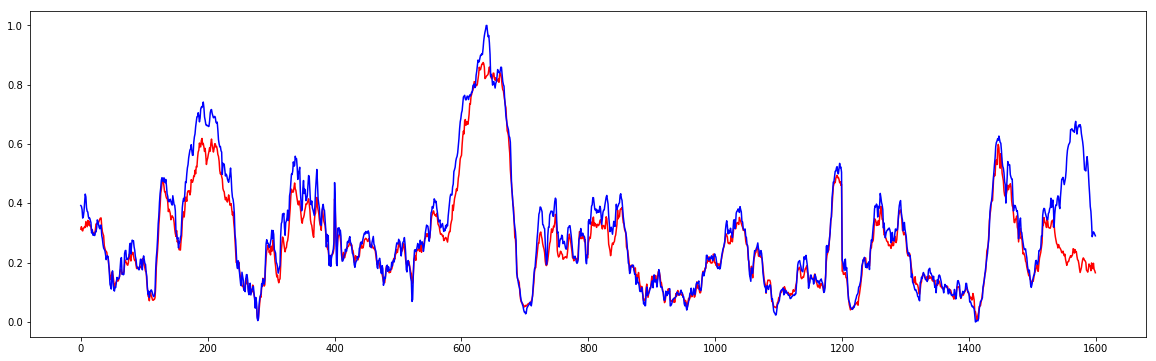

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, prediction)

plt.figure(figsize=(20,6))
figure = plt.plot(prediction[:, 0], 'r')
figyre = plt.plot(y_train[:, 0], 'b')

model.save('E:/20190924_match_pro/regression/model/20190322_larger_20.h5')